<a href="https://colab.research.google.com/github/SamarSalih/-/blob/main/First_Trail_Kids_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET Augmentation $ Model Training section:

---





In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Step 1: Install YOLOv8 and additional libraries
!pip install ultralytics --upgrade  # Install the latest version of YOLOv8
!pip install ultralytics opencv-python albumentations  # Install YOLOv8, OpenCV, and Albumentations

In [17]:
# Import necessary libraries
import os  # For interacting with the operating system
import zipfile  # For handling zip files
from ultralytics import YOLO  # For using YOLOv8
import cv2  # For computer vision tasks
import albumentations as A  # For image augmentation
from albumentations.core.composition import OneOf  # For applying one of several transformations
import random  # For random number generation


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [18]:
# Path to the compressed dataset
dataset_zip_path = "/content/drive/MyDrive/kidsproject/kids_adult.v1i.yolov8.zip"
unzip_dir = "/content/dataset"  # Directory to unzip the files

# Unzip the files
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Display the contents of the directory to confirm
print("Contents of dataset directory:", os.listdir(unzip_dir))


Contents of dataset directory: ['train', 'README.roboflow.txt', 'valid', 'README.dataset.txt', 'data.yaml', 'test']


In [19]:
# Function to perform image augmentation
def augment_images(image_folder, output_folder, num_augments=2):
    """
    Expands the dataset by creating new images with augmentation applied.
    """
    os.makedirs(output_folder, exist_ok=True)

    # Set up the transformations
    transform = A.Compose([
        A.RandomBrightnessContrast(p=0.5),
        A.HorizontalFlip(p=0.5),
        OneOf([
            A.GaussianBlur(p=0.3),
            A.MotionBlur(p=0.3),
        ], p=0.5),
        A.Rotate(limit=30, p=0.5),
    ])

    # Process each image in the folder
    for image_name in os.listdir(image_folder):
        if image_name.endswith(".jpg"):  # Ensure the file is an image
            image_path = os.path.join(image_folder, image_name)
            image = cv2.imread(image_path)

            for i in range(num_augments):
                augmented = transform(image=image)
                augmented_image = augmented['image']

                # Save the augmented image
                new_image_name = f"{os.path.splitext(image_name)[0]}_aug_{i}.jpg"
                new_image_path = os.path.join(output_folder, new_image_name)
                cv2.imwrite(new_image_path, augmented_image)

# Paths for original and augmented images
original_images_path = os.path.join(unzip_dir, "train", "images")
augmented_images_path = os.path.join(unzip_dir, "train", "augmented_images")

# Perform augmentation
augment_images(original_images_path, augmented_images_path, num_augments=3)
print(f"Augmented images saved in: {augmented_images_path}")


Augmented images saved in: /content/dataset/train/augmented_images


In [20]:
# Create the data.yaml configuration file
data_yaml = """
path: /content/dataset
train: train/images
val: valid/images
test: test/images

names:
  1: child
  0: adult
"""

# Save the data.yaml file
with open("/content/dataset/data.yaml", "w") as f:
    f.write(data_yaml)

In [21]:
#YOLOV8 training
model = YOLO("yolov8n.pt")  # يمكنك اختيار النموذج المناسب (n, s, m, l, x)
results = model.train(data="/content/dataset/data.yaml", epochs=3, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 67.1MB/s]


Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 1391 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1391/1391 [00:01<00:00, 1380.19it/s]

train: New cache created: /content/dataset/train/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 2892. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 275 images, 0 backgrounds, 0 corrupt: 100%|██████████| 275/275 [00:00<00:00, 1714.05it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.236      2.226      1.472         70        640: 100%|██████████| 87/87 [20:57<00:00, 14.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:34<00:00, 10.53s/it]

                   all        275        571      0.437       0.44      0.412      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G        1.3        1.9      1.497         94        640: 100%|██████████| 87/87 [21:09<00:00, 14.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:32<00:00, 10.23s/it]

                   all        275        571      0.485      0.527      0.493      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.251       1.79      1.485         51        640: 100%|██████████| 87/87 [20:58<00:00, 14.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:31<00:00, 10.20s/it]

                   all        275        571      0.501      0.523        0.5      0.262



3 epochs completed in 1.132 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:21<00:00,  9.02s/it]


                   all        275        571      0.502      0.521        0.5      0.262
                 adult        154        245      0.522      0.416      0.477      0.262
                 child        247        326      0.482      0.625      0.523      0.261
Speed: 8.7ms preprocess, 270.9ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train


# Evaluate the model Section:

---



In [22]:
metrics_dict = results.results_dict

# Print metrics under each other
for metric, value in metrics_dict.items():
    print(f"{metric}: {value}")

metrics/precision(B): 0.5017837223358635
metrics/recall(B): 0.5205565134369694
metrics/mAP50(B): 0.5001601815926418
metrics/mAP50-95(B): 0.2616635710294055
fitness: 0.28551323208572915


In [23]:
# Test the model on the test images
test_results = model.val(data="/content/dataset/data.yaml")

# Display performance metrics on test images
print(f"Validation Performance Metrics:")
print(f"mAP@0.5: {test_results.box.map50:.4f}")       # Mean average precision at IoU 0.5
print(f"mAP@0.5:0.95: {test_results.box.map:.4f}")   # Mean average precision between IoU 0.5 and 0.95

# Extract Precision and Recall
precision = test_results.box.p  # List of precision values for each class
recall = test_results.box.r     # List of recall values for each class

# Print precision and recall
print(f"Precision (all classes): {precision}")
print(f"Recall (all classes): {recall}")


Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 275 images, 0 backgrounds, 0 corrupt: 100%|██████████| 275/275 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:11<00:00,  3.99s/it]


                   all        275        571      0.495      0.537      0.503      0.262
                 adult        154        245      0.516      0.437      0.479      0.261
                 child        247        326      0.474      0.638      0.528      0.264
Speed: 2.3ms preprocess, 246.2ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train2
Validation Performance Metrics:
mAP@0.5: 0.5034
mAP@0.5:0.95: 0.2624
Precision (all classes): [    0.51566      0.4742]
Recall (all classes): [    0.43673     0.63804]


Columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


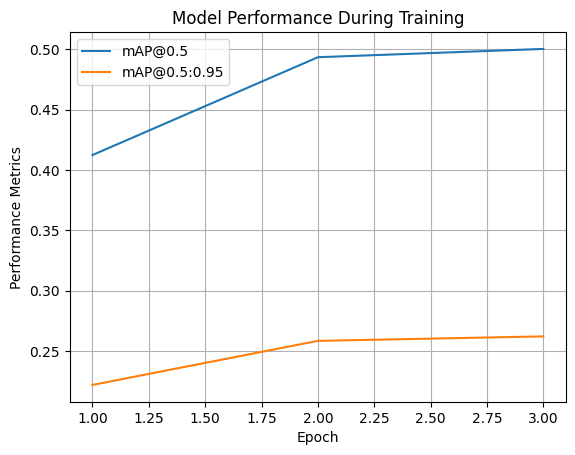

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to the directory containing the training results
results_dir = '/content/runs/detect/train'  # Ensure to update the path according to your folder
metrics_path = os.path.join(results_dir, "results.csv")

if os.path.exists(metrics_path):
    metrics_data = pd.read_csv(metrics_path)

    # Print columns to verify the names
    print("Columns:", metrics_data.columns)

    # Plot mAP for each epoch using the correct columns
    plt.plot(metrics_data["epoch"], metrics_data["metrics/mAP50(B)"], label="mAP@0.5")  # Correct column name
    plt.plot(metrics_data["epoch"], metrics_data["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")  # Correct column name
    plt.xlabel("Epoch")
    plt.ylabel("Performance Metrics")
    plt.title("Model Performance During Training")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Metrics file not found!")


In [25]:

# Save the trained model to Google Drive
model_path = "/content/drive/MyDrive/kidsproject/yolov8_kids_adult.pt"
model.save(model_path)
print(f"Trained model saved at: {model_path}")


Trained model saved at: /content/drive/MyDrive/kidsproject/yolov8_kids_adult.pt


In [26]:

# Path of the image to test
image_path = "/content/dataset/test/images/IMG_1267_jpg.rf.95b7643fec5e05f84686d3d69ab00a6f.jpg"  # Replace with your image path

# Load the trained model
model = YOLO("/content/drive/MyDrive/kidsproject/yolov8_kids_adult.pt")

# Perform prediction on the image
results = model.predict(source=image_path, save=True, conf=0.25)  # You can adjust the confidence value (conf) if needed

# Display the prediction results
print("Prediction completed. Results saved in:", results[0].save_dir)



image 1/1 /content/dataset/test/images/IMG_1267_jpg.rf.95b7643fec5e05f84686d3d69ab00a6f.jpg: 480x640 5 adults, 4 childs, 286.3ms
Speed: 6.2ms preprocess, 286.3ms inference, 18.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
Prediction completed. Results saved in: runs/detect/predict
